In [1]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Read in csv as a DataFrame and preview it
df = pd.read_csv("gss_sub.csv")
df

year      id  ... inequality household_size
0      1972.0     1.0  ...        NaN            1.0
1      1972.0     2.0  ...        NaN            2.0
2      1972.0     3.0  ...        NaN            4.0
3      1972.0     4.0  ...        NaN            2.0
4      1972.0     5.0  ...        NaN            2.0
...       ...     ...  ...        ...            ...
59594  2014.0  2539.0  ...        NaN            1.0
59595  2014.0  2540.0  ...        NaN            1.0
59596  2014.0  2541.0  ...        NaN            3.0
59597  2014.0  2542.0  ...        NaN            2.0
59598  2014.0  2543.0  ...        NaN            1.0

[59599 rows x 16 columns]

In [2]:
# Inspecting our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   59599 non-null  float64
 1   id                     59599 non-null  float64
 2   labor_status           59583 non-null  object 
 3   self_employed          59306 non-null  object 
 4   marital_status         59575 non-null  object 
 5   n_siblings             56682 non-null  float64
 6   age                    59599 non-null  float64
 7   high_school            59440 non-null  float64
 8   degree                 59464 non-null  object 
 9   political_affiliation  59257 non-null  object 
 10  environment            59388 non-null  object 
 11  law_enforcement        59378 non-null  object 
 12  drugs                  59380 non-null  object 
 13  space_exploration      59596 non-null  object 
 14  inequality             1532 non-null   float64
 15  ho

Above we see that our DataFrame contains `float64` column (numerical data), as well as a number of `object` columns. Object data types contain strings.

In [3]:
df.describe(include="O")

labor_status self_employed  ...  drugs space_exploration
count              59583         59306  ...  59380             59596
unique                 8             4  ...      5                 5
top     WORKING FULLTIME  SOMEONE ELSE  ...    IAP               IAP
freq               29437         49497  ...  38143             59115

[4 rows x 9 columns]

The [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method can give you a greater insight into the distribution and structure of a column.

In [4]:
df["environment"].value_counts()

IAP            38143
TOO LITTLE     13183
ABOUT RIGHT     5445
TOO MUCH        1698
DK               919
Name: environment, dtype: int64

In [5]:
# Create a dictionary of column and data type mappings
conversion_dict = {k: "category" for k in df.select_dtypes(include="object").columns}

# Convert our DataFrame and check the data types
df = df.astype(conversion_dict)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   59599 non-null  float64 
 1   id                     59599 non-null  float64 
 2   labor_status           59583 non-null  category
 3   self_employed          59306 non-null  category
 4   marital_status         59575 non-null  category
 5   n_siblings             56682 non-null  float64 
 6   age                    59599 non-null  float64 
 7   high_school            59440 non-null  float64 
 8   degree                 59464 non-null  category
 9   political_affiliation  59257 non-null  category
 10  environment            59388 non-null  category
 11  law_enforcement        59378 non-null  category
 12  drugs                  59380 non-null  category
 13  space_exploration      59596 non-null  category
 14  inequality             1532 non-null  

Already we can see that the memory usage of the DataFrame has been halved from 7 mb to 4 mb! This can help when working with large quantities of data, such as this survey that we'll be working with.

In [6]:
df['labor_status'].cat.categories

Index(['KEEPING HOUSE', 'OTHER', 'RETIRED', 'SCHOOL', 'TEMP NOT WORKING',
       'UNEMPL, LAID OFF', 'WORKING FULLTIME', 'WORKING PARTTIME'],
      dtype='object')

In [7]:
# Create a dictionary of categories to collapse
new_labor_status = {"UNEMPL, LAID OFF": "UNEMPLOYED", 
                    "TEMP NOT WORKING": "UNEMPLOYED",
                    "WORKING FULLTIME": "EMPLOYED",
                    "WORKING PARTTIME": "EMPLOYED"
                   }

# Replace the values in the column and reset as a category
df["labor_status_clean"] = df["labor_status"].replace(new_labor_status).astype("category")

# Preview the new column
df["labor_status_clean"].value_counts()

EMPLOYED         35552
KEEPING HOUSE     9650
RETIRED           8102
UNEMPLOYED        3230
SCHOOL            1841
OTHER             1208
Name: labor_status_clean, dtype: int64

In [8]:
df["environment"].cat.categories

Index(['ABOUT RIGHT', 'DK', 'IAP', 'TOO LITTLE', 'TOO MUCH'], dtype='object')

In [9]:
# Set the new order
new_order = ["TOO LITTLE", "ABOUT RIGHT", "TOO MUCH", "DK", "IAP"]
categories_to_remove = ["DK", "IAP"]

# Loop through each column
for col in ["environment", "law_enforcement", "drugs"]:
    # Reorder and remove the categories
    df[col + "_clean"] = df[col].cat.reorder_categories(new_order, ordered=True)
    df[col + "_clean"] = df[col + "_clean"].cat.remove_categories(categories_to_remove)

# Preview one of the columns' categories
df["environment_clean"].cat.categories

Index(['TOO LITTLE', 'ABOUT RIGHT', 'TOO MUCH'], dtype='object')

In [10]:
# Define a dictionary to map old degree categories to new ones
new_degree = {"LT HIGH SCHOOL": "HIGH SCHOOL", 
              "BACHELOR": "COLLEGE/UNIVERSITY",
              "GRADUATE": "COLLEGE/UNIVERSITY",
              "JUNIOR COLLEGE": "COLLEGE/UNIVERSITY"}

# Replace old degree categories with new ones and convert to categorical data type
df["degree_clean"] = df["degree"].replace(new_degree).astype("category")

# Remove "DK" category from degree_clean column
df["degree_clean"] = df["degree_clean"].cat.remove_categories(["DK"])

# Reorder degree_clean categories and set as ordered
df["degree_clean"] = df["degree_clean"].cat.reorder_categories(["HIGH SCHOOL", "COLLEGE/UNIVERSITY"], ordered = True)

# Preview the new column
df["degree_clean"].value_counts()

HIGH SCHOOL           43553
COLLEGE/UNIVERSITY    15881
Name: degree_clean, dtype: int64

In [11]:
# Set the decade boundaries and labels
decade_boundaries = [(1970, 1979), (1979, 1989), (1989, 1999), (1999, 2009), (2009, 2019)]
decade_labels = ['1970s', '1980s', '1990s', '2000s', '2010s']

# Set the bins and cut the DataFrame
bins = pd.IntervalIndex.from_tuples(decade_boundaries)
df["decade"]= pd.cut(df["year"], bins)

# Rename the categories
df["decade"].cat.rename_categories(decade_labels, inplace = True)

# Preview the new column
df[["year", "decade"]]

year decade
0      1972.0  1970s
1      1972.0  1970s
2      1972.0  1970s
3      1972.0  1970s
4      1972.0  1970s
...       ...    ...
59594  2014.0  2010s
59595  2014.0  2010s
59596  2014.0  2010s
59597  2014.0  2010s
59598  2014.0  2010s

[59599 rows x 2 columns]

## Visualizing categorical variables

In [12]:
# Create a new figure object
fig = px.bar(df["labor_status_clean"].value_counts(),template = "plotly_white")

# Hide the legend and show the plot
fig.update_layout(showlegend = False)
fig.show()


In [13]:
fig = px.bar(df["labor_status_clean"].value_counts(ascending = True),
             template = "plotly_white",
             orientation= "h",
              title= "Labor Status By Count")

# Hide the legend and show the plot
fig.update_layout(showlegend = False)
fig.show()

In [14]:
# Aggregate household size by year
household_by_year = df.groupby(["decade"], as_index = False)["household_size"].mean()
household_by_year

decade  household_size
0  1970s        3.234698
1  1980s        2.738080
2  1990s        2.545035
3  2000s        2.462987
4  2010s        2.410159

In [15]:
# Create a new figure object
fig = px.bar(household_by_year,
            x = "decade",
            y = "household_size",
             template= "plotly_white",
             title = "Average household size by decade"
            )

# Show the plot
fig.show()

In [16]:
# Create a new figure object
fig = px.box(df, x="age", y="labor_status_clean", template= "plotly_white")

# Show the plot
fig.show()

In [17]:
pd.crosstab(df["degree_clean"], df["law_enforcement_clean"])

law_enforcement_clean  TOO LITTLE  ABOUT RIGHT  TOO MUCH
degree_clean                                            
HIGH SCHOOL                  8063         4879      1340
COLLEGE/UNIVERSITY           3230         2635       428

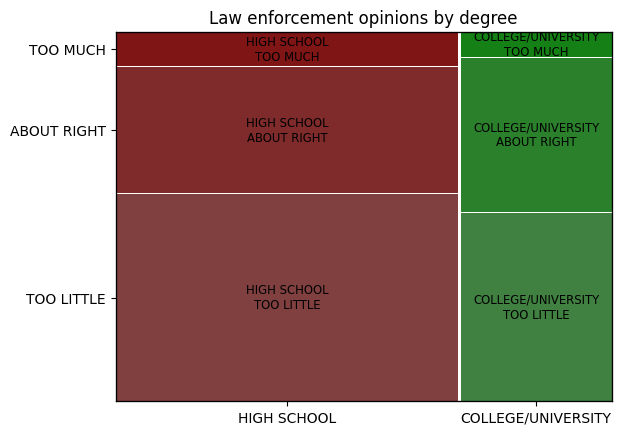

In [18]:
# Create a mosaic plot and show it
mosaic(df,["degree_clean", "law_enforcement_clean"], title= "Law enforcement opinions by degree"
       
      )

plt.show()

In [19]:
# Group the dataframe by year and marital status, and calculate the normalized value counts
marital_rates = df.groupby(["year"], as_index= False)["marital_status"].value_counts(normalize = True)

# Display the resulting DataFrame
marital_rates

year marital_status  proportion
0    1972.0        MARRIED    0.719157
1    1972.0  NEVER MARRIED    0.130192
2    1972.0        WIDOWED    0.086175
3    1972.0       DIVORCED    0.040298
4    1972.0      SEPARATED    0.024179
..      ...            ...         ...
145  2014.0        MARRIED    0.456985
146  2014.0  NEVER MARRIED    0.266377
147  2014.0       DIVORCED    0.162194
148  2014.0        WIDOWED    0.082478
149  2014.0      SEPARATED    0.031965

[150 rows x 3 columns]

In [ ]:
# Above shown is a proportion of marital status and year in our dataframe.